In [18]:
!pip install ydata_profiling

                                              0.0/357.3 kB ? eta -:--:--
     ----                                  41.0/357.3 kB 667.8 kB/s eta 0:00:01
     -----------------                      163.8/357.3 kB 1.2 MB/s eta 0:00:01
     --------------------------             245.8/357.3 kB 1.4 MB/s eta 0:00:01
     ------------------------------         286.7/357.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  348.2/357.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 357.3/357.3 kB 1.2 MB/s eta 0:00:00
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp311-cp311-win_amd64.whl (663 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached wordcloud-1.9.2-cp311-cp311-win_amd64.whl (151 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)


In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import requests
from scipy import stats
import ydata_profiling as pp
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [141]:
from numba import njit

In [142]:
df=pd.read_excel("C://Users//GoD//Documents//allPlayers.xlsx")
df

Unnamed: 0               id                 name         name_display  \
0               0   52776826679422           K. MbappÃ©           K. MbappÃ©   
1               1   17592722922839             L. Messi             L. Messi   
2               2  299067699633495             L. Messi             L. Messi   
3               3   52776826701919            Ansu Fati            Ansu Fati   
4               4   52776826629150             K. Coman             K. Coman   
...           ...              ...                  ...                  ...   
30904       30904           155595         Thithawat R.         Thithawat R.   
30905       30905           157726      Thiraphat Yuyen      Thiraphat Yuyen   
30906       30906           147675         Thanaphat K.         Thanaphat K.   
30907       30907           147673   Jarupong Thongkhot   Jarupong Thongkhot   
30908       30908           153971  Pattarapon Suksakit  Pattarapon Suksakit   

       team_id   team_name  nat   nat_name  age  height  pos    pos_type  \
0          NaN         NaN  208     France   23     178   CF     Forward   
1          NaN         NaN  144  Argentina   31     170  RWF     Forward   
2          NaN         NaN  144  Argentina   31     170  RWF     Forward   
3          NaN         NaN  236      Spain   19     178  LWF     Forward   
4          NaN         NaN  208     France   25     179  RMF  Midfielder   
...        ...         ...  ...        ...  ...     ...  ...         ...   
30904      NaN         NaN   36   Thailand   16     170  CMF  Midfielder   
30905   5403.0  Ratchaburi   36   Thailand   15     170  CMF  Midfielder   
30906   5403.0  Ratchaburi   36   Thailand   17     170  CMF  Midfielder   
30907      NaN         NaN   36   Thailand   16     170   CB    Defender   
30908   5404.0   Sukhothai   36   Thailand   18     170   CB    Defender   

       pos_id            pos_name  ovr  pot  dribbling  low_pass  finishing  \
0          12      Centre Forward   97   97         90        77         87   
1          10  Right Wing Forward   94  102         91        84         90   
2          10  Right Wing Forward   94   99         91        84         90   
3           9   Left Wing Forward   94   94         86        76         84   
4           7    Right Midfielder   94   94         90        82         77   
...       ...                 ...  ...  ...        ...       ...        ...   
30904       5   Centre Midfielder   50    0         55        55         50   
30905       5   Centre Midfielder   50    0         53        55         51   
30906       5   Centre Midfielder   50   64         50        53         50   
30907       1         Centre Back   50   64         43        47         42   
30908       1         Centre Back   50    0         52        55         42   

       defensive_awareness  speed  body_balance  condition  cost_gp  \
0                       53     93            76          4   1200.0   
1                       45     74            57          3   1200.0   
2                       45     74            57          3   1200.0   
3                       49     86            59          4   1200.0   
4                       59     94            65          4   1200.0   
...                    ...    ...           ...        ...      ...   
30904                   51     66            50          2      3.0   
30905                   51     58            52          2      3.0   
30906                   50     60            54          2      3.0   
30907                   52     61            53          2      3.0   
30908                   55     58            55          2      3.0   

                                                     url  \
0        /k-mbappe/efootball-2022/player/52776826679422/   
1         /l-messi/efootball-2022/player/17592722922839/   
2        /l-messi/efootball-2022/player/299067699633495/   
3       /ansu-fati/efootball-2022/player/52776826701919/   
4         /k-coman/efootball-20

In [143]:
df.head()

Unnamed: 0               id        name name_display  team_id team_name  \
0           0   52776826679422  K. MbappÃ©   K. MbappÃ©      NaN       NaN   
1           1   17592722922839    L. Messi     L. Messi      NaN       NaN   
2           2  299067699633495    L. Messi     L. Messi      NaN       NaN   
3           3   52776826701919   Ansu Fati    Ansu Fati      NaN       NaN   
4           4   52776826629150    K. Coman     K. Coman      NaN       NaN   

   nat   nat_name  age  height  pos    pos_type  pos_id            pos_name  \
0  208     France   23     178   CF     Forward      12      Centre Forward   
1  144  Argentina   31     170  RWF     Forward      10  Right Wing Forward   
2  144  Argentina   31     170  RWF     Forward      10  Right Wing Forward   
3  236      Spain   19     178  LWF     Forward       9   Left Wing Forward   
4  208     France   25     179  RMF  Midfielder       7    Right Midfielder   

   ovr  pot  dribbling  low_pass  finishing  defensive_awareness  speed  \
0   97   97         90        77         87                   53     93   
1   94  102         91        84         90                   45     74   
2   94   99         91        84         90                   45     74   
3   94   94         86        76         84                   49     86   
4   94   94         90        82         77                   59     94   

   body_balance  condition  cost_gp  \
0            76          4   1200.0   
1            57          3   1200.0   
2            57          3   1200.0   
3            59          4   1200.0   
4            65          4   1200.0   

                                                url  \
0   /k-mbappe/efootball-2022/player/52776826679422/   
1    /l-messi/efootball-2022/player/17592722922839/   
2   /l-messi/efootball-2022/player/299067699633495/   
3  /ansu-fati/efootball-2022/player/52776826701919/   
4    /k-coman/efootball-2022/player/52776826629150/   

                                               image  \
0  /efootball-2022/graphics/players/Variation2022...   
1  /efootball-2022/graphics/players/Variation2022...   
2  /efootball-2022/graphics/players/Variation2022...   
3  /efootball-2022/graphics/players/Variation2022...   
4  /efootball-2022/graphics/players/Variation2022...   

                                        image_team  \
0  /efootball-2022/graphics/teamlogos/e_000000.png   
1  /efootball-2022/graphics/teamlogos/e_000000.png   
2  /efootball-2022/graphics/teamlogos/e_000000.png   
3  /efootball-2022/graphics/teamlogos/e_000000.png   
4  /efootball-2022/graphics/teamlogos/e_000000.png   

                                image_country  
0  /efootball-2022/graphics/countries/208.png  
1  /efootball-2022/graphics/countries/144.png  
2  /efootball-2022/graphics/countries/144.png  
3  /efootball-2022/graphics/countries/236.png  
4  /efootball-2022/graphics/countries/208.png

In [144]:
df.shape

(30909, 28)

In [145]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [146]:
df.columns

Index(['id', 'name', 'name_display', 'team_id', 'team_name', 'nat', 'nat_name',
       'age', 'height', 'pos', 'pos_type', 'pos_id', 'pos_name', 'ovr', 'pot',
       'dribbling', 'low_pass', 'finishing', 'defensive_awareness', 'speed',
       'body_balance', 'condition', 'cost_gp', 'url', 'image', 'image_team',
       'image_country'],
      dtype='object')

In [147]:
df.ndim

2

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30909 entries, 0 to 30908
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   30909 non-null  int64  
 1   name                 30909 non-null  object 
 2   name_display         30909 non-null  object 
 3   team_id              17823 non-null  float64
 4   team_name            17823 non-null  object 
 5   nat                  30909 non-null  int64  
 6   nat_name             30909 non-null  object 
 7   age                  30909 non-null  int64  
 8   height               30909 non-null  int64  
 9   pos                  30909 non-null  object 
 10  pos_type             30909 non-null  object 
 11  pos_id               30909 non-null  int64  
 12  pos_name             30909 non-null  object 
 13  ovr                  30909 non-null  int64  
 14  pot                  30909 non-null  int64  
 15  dribbling            30909 non-null 

In [149]:
df.describe()

id       team_id           nat           age        height  \
count  3.090900e+04  17823.000000  30909.000000  30909.000000  30909.000000   
mean   1.504697e+12   3961.605566    152.764729     24.629558    180.443042   
std    1.253809e+13   5372.138023     73.244424      5.006416      6.807236   
min    9.000000e+00    100.000000      1.000000     15.000000    155.000000   
25%    1.162730e+05    362.000000    124.000000     21.000000    175.000000   
50%    1.403390e+05   2193.000000    148.000000     24.000000    180.000000   
75%    1.550450e+05   5137.000000    211.000000     28.000000    185.000000   
max    3.694370e+14  22260.000000    311.000000     54.000000    208.000000   

             pos_id           ovr           pot     dribbling      low_pass  \
count  30909.000000  30909.000000  30909.000000  30909.000000  30909.000000   
mean       5.009609     66.452587     57.554175     60.725323     61.065968   
std        4.039256      6.810046     33.602729      8.615363      7.001859   
min        0.000000     50.000000      0.000000     40.000000     40.000000   
25%        1.000000     61.000000     53.000000     56.000000     57.000000   
50%        4.000000     66.000000     74.000000     62.000000     61.000000   
75%        8.000000     70.000000     81.000000     66.000000     65.000000   
max       12.000000     97.000000    102.000000     93.000000     93.000000   

          finishing  defensive_awareness         speed  body_balance  \
count  30909.000000         30909.000000  30909.000000  30909.000000   
mean      55.204601            55.235110     65.483031     63.973276   
std        9.056421             8.117266      6.963684      6.742893   
min       40.000000            40.000000     40.000000     44.000000   
25%       49.000000            49.000000     62.000000     59.000000   
50%       56.000000            55.000000     66.000000     63.000000   
75%       62.000000            61.000000     70.000000     68.000000   
max       92.000000            91.000000     94.000000     92.000000   

          condition       cost_gp  
count  30909.000000  30909.000000  
mean       2.043127     13.253421  
std        0.427609     68.031976  
min        0.000000      3.000000  
25%        2.000000      3.000000  
50%        2.000000      3.200000  
75%        2.000000      4.700000  
max        4.000000   1200.000000

In [150]:
df.condition.value_counts()

2    27414
3     1641
1     1116
4      571
0      167
Name: condition, dtype: int64

In [151]:
df.nat_name.value_counts()

Brazil                    2752
Argentina                 1870
Spain                     1729
Japan                     1680
Italy                     1590
                          ... 
Sudan                        1
Afghanistan                  1
Lesotho                      1
Montserrat                   1
British Virgin Islands       1
Name: nat_name, Length: 172, dtype: int64

In [152]:
df.pos.value_counts()

CB     5147
CF     3977
CMF    3812
GK     3731
RB     2356
DMF    2331
LB     2215
AMF    1983
LWF    1639
RWF    1554
RMF     910
LMF     846
SS      408
Name: pos, dtype: int64

In [153]:
#download the data file in repo
df.to_csv('finl_efootball_data.csv', index=False)

In [154]:
pd.set_option('display.max_columns', 50)
df.head()

id        name name_display  team_id team_name  nat  \
0   52776826679422  K. MbappÃ©   K. MbappÃ©      NaN       NaN  208   
1   17592722922839    L. Messi     L. Messi      NaN       NaN  144   
2  299067699633495    L. Messi     L. Messi      NaN       NaN  144   
3   52776826701919   Ansu Fati    Ansu Fati      NaN       NaN  236   
4   52776826629150    K. Coman     K. Coman      NaN       NaN  208   

    nat_name  age  height  pos    pos_type  pos_id            pos_name  ovr  \
0     France   23     178   CF     Forward      12      Centre Forward   97   
1  Argentina   31     170  RWF     Forward      10  Right Wing Forward   94   
2  Argentina   31     170  RWF     Forward      10  Right Wing Forward   94   
3      Spain   19     178  LWF     Forward       9   Left Wing Forward   94   
4     France   25     179  RMF  Midfielder       7    Right Midfielder   94   

   pot  dribbling  low_pass  finishing  defensive_awareness  speed  \
0   97         90        77         87                   53     93   
1  102         91        84         90                   45     74   
2   99         91        84         90                   45     74   
3   94         86        76         84                   49     86   
4   94         90        82         77                   59     94   

   body_balance  condition  cost_gp  \
0            76          4   1200.0   
1            57          3   1200.0   
2            57          3   1200.0   
3            59          4   1200.0   
4            65          4   1200.0   

                                                url  \
0   /k-mbappe/efootball-2022/player/52776826679422/   
1    /l-messi/efootball-2022/player/17592722922839/   
2   /l-messi/efootball-2022/player/299067699633495/   
3  /ansu-fati/efootball-2022/player/52776826701919/   
4    /k-coman/efootball-2022/player/52776826629150/   

                                               image  \
0  /efootball-2022/graphics/players/Variation2022...   
1  /efootball-2022/graphics/players/Variation2022...   
2  /efootball-2022/graphics/players/Variation2022...   
3  /efootball-2022/graphics/players/Variation2022...   
4  /efootball-2022/graphics/players/Variation2022...   

                                        image_team  \
0  /efootball-2022/graphics/teamlogos/e_000000.png   
1  /efootball-2022/graphics/teamlogos/e_000000.png   
2  /efootball-2022/graphics/teamlogos/e_000000.png   
3  /efootball-2022/graphics/teamlogos/e_000000.png   
4  /efootball-2022/graphics/teamlogos/e_000000.png   

                                image_country  
0  /efootball-2022/graphics/countries/208.png  
1  /efootball-2022/graphics/countries/144.png  
2  /efootball-2022/graphics/countries/144.png  
3  /efootball-2022/graphics/countries/236.png  
4  /efootball-2022/graphics/countries/208.png

In [155]:
df.drop(['team_id'],axis=1,inplace=True)

In [17]:
df['cost_gp'] = df['cost_gp'].astype(int)
df['cost_gp']

0        1200
1        1200
2        1200
3        1200
4        1200
         ... 
30904       3
30905       3
30906       3
30907       3
30908       3
Name: cost_gp, Length: 30909, dtype: int32

In [18]:
# installing the modules
#!pip3 install openpyxl
!pip3 install openpyxl-image-loader

In [156]:
df.drop(['url'],axis=1,inplace=True)

In [157]:
df.drop(['image'],axis=1,inplace=True)

In [158]:
df.drop(['image_team'],axis=1,inplace=True)

In [159]:
df.drop(['image_country'],axis=1,inplace=True)

In [160]:
# drop duplicate rows
df['name'].drop_duplicates(inplace=True)

In [161]:
df.isnull().sum()

id                         0
name                       0
name_display               0
team_name              13086
nat                        0
nat_name                   0
age                        0
height                     0
pos                        0
pos_type                   0
pos_id                     0
pos_name                   0
ovr                        0
pot                        0
dribbling                  0
low_pass                   0
finishing                  0
defensive_awareness        0
speed                      0
body_balance               0
condition                  0
cost_gp                    0
dtype: int64

In [162]:
df['team_name']=df['team_name'].fillna('Unknown',inplace=True)

In [163]:
# check unique values in each feature 
df.nunique()

id                     30909
name                   27618
name_display           27618
team_name                  0
nat                      172
nat_name                 172
age                       32
height                    51
pos                       13
pos_type                   4
pos_id                    13
pos_name                  13
ovr                       46
pot                       56
dribbling                 54
low_pass                  54
finishing                 52
defensive_awareness       52
speed                     53
body_balance              48
condition                  5
cost_gp                   68
dtype: int64

In [164]:
df['name'].nunique()

27618

In [165]:
#Checking the outliers in all features
numeric_cols=['id','nat','age','height','pos_id','ovr','pot','dribbling','low_pass','finishing','defensive_awareness','speed','body_balance','condition','cost_gp']
outlier_count = {}
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = len(outliers)
print(outlier_count)


{'id': 9272, 'nat': 0, 'age': 114, 'height': 47, 'pos_id': 0, 'ovr': 705, 'pot': 7469, 'dribbling': 562, 'low_pass': 796, 'finishing': 95, 'defensive_awareness': 112, 'speed': 570, 'body_balance': 279, 'condition': 3495, 'cost_gp': 4209}


In [166]:
df

id                 name         name_display team_name  \
0       52776826679422           K. MbappÃ©           K. MbappÃ©      None   
1       17592722922839             L. Messi             L. Messi      None   
2      299067699633495             L. Messi             L. Messi      None   
3       52776826701919            Ansu Fati            Ansu Fati      None   
4       52776826629150             K. Coman             K. Coman      None   
...                ...                  ...                  ...       ...   
30904           155595         Thithawat R.         Thithawat R.      None   
30905           157726      Thiraphat Yuyen      Thiraphat Yuyen      None   
30906           147675         Thanaphat K.         Thanaphat K.      None   
30907           147673   Jarupong Thongkhot   Jarupong Thongkhot      None   
30908           153971  Pattarapon Suksakit  Pattarapon Suksakit      None   

       nat   nat_name  age  height  pos    pos_type  pos_id  \
0      208     France   23     178   CF     Forward      12   
1      144  Argentina   31     170  RWF     Forward      10   
2      144  Argentina   31     170  RWF     Forward      10   
3      236      Spain   19     178  LWF     Forward       9   
4      208     France   25     179  RMF  Midfielder       7   
...    ...        ...  ...     ...  ...         ...     ...   
30904   36   Thailand   16     170  CMF  Midfielder       5   
30905   36   Thailand   15     170  CMF  Midfielder       5   
30906   36   Thailand   17     170  CMF  Midfielder       5   
30907   36   Thailand   16     170   CB    Defender       1   
30908   36   Thailand   18     170   CB    Defender       1   

                 pos_name  ovr  pot  dribbling  low_pass  finishing  \
0          Centre Forward   97   97         90        77         87   
1      Right Wing Forward   94  102         91        84         90   
2      Right Wing Forward   94   99         91        84         90   
3       Left Wing Forward   94   94         86        76         84   
4        Right Midfielder   94   94         90        82         77   
...                   ...  ...  ...        ...       ...        ...   
30904   Centre Midfielder   50    0         55        55         50   
30905   Centre Midfielder   50    0         53        55         51   
30906   Centre Midfielder   50   64         50        53         50   
30907         Centre Back   50   64         43        47         42   
30908         Centre Back   50    0         52        55         42   

       defensive_awareness  speed  body_balance  condition  cost_gp  
0                       53     93            76          4   1200.0  
1                       45     74            57          3   1200.0  
2                       45     74            57          3   1200.0  
3                       49     86            59          4   1200.0  
4                       59     94            65          4   1200.0  
...                    ...    ...           ...        ...      ...  
30904                   51     66            50          2      3.0  
30905                   51     58            52          2      3.0  
30906                   50     60            54          2      3.0  
30907                   52     61            53          2      3.0  
30908                   55     58            55          2      3.0  

[30909 rows x 22 columns]

In [167]:
df['nat_name'].value_counts()

Brazil                    2752
Argentina                 1870
Spain                     1729
Japan                     1680
Italy                     1590
                          ... 
Sudan                        1
Afghanistan                  1
Lesotho                      1
Montserrat                   1
British Virgin Islands       1
Name: nat_name, Length: 172, dtype: int64

In [168]:
df.head()

id        name name_display team_name  nat   nat_name  age  \
0   52776826679422  K. MbappÃ©   K. MbappÃ©      None  208     France   23   
1   17592722922839    L. Messi     L. Messi      None  144  Argentina   31   
2  299067699633495    L. Messi     L. Messi      None  144  Argentina   31   
3   52776826701919   Ansu Fati    Ansu Fati      None  236      Spain   19   
4   52776826629150    K. Coman     K. Coman      None  208     France   25   

   height  pos    pos_type  pos_id            pos_name  ovr  pot  dribbling  \
0     178   CF     Forward      12      Centre Forward   97   97         90   
1     170  RWF     Forward      10  Right Wing Forward   94  102         91   
2     170  RWF     Forward      10  Right Wing Forward   94   99         91   
3     178  LWF     Forward       9   Left Wing Forward   94   94         86   
4     179  RMF  Midfielder       7    Right Midfielder   94   94         90   

   low_pass  finishing  defensive_awareness  speed  body_balance  condition  \
0        77         87                   53     93            76          4   
1        84         90                   45     74            57          3   
2        84         90                   45     74            57          3   
3        76         84                   49     86            59          4   
4        82         77                   59     94            65          4   

   cost_gp  
0   1200.0  
1   1200.0  
2   1200.0  
3   1200.0  
4   1200.0

In [169]:
# Sorting by column 'Country'
df.sort_values(by=['nat_name','name','name_display'])

id         name name_display team_name  nat     nat_name  age  \
19239  148380     D. Najem     D. Najem      None    1  Afghanistan   29   
8523   102105   A. Abrashi   A. Abrashi      None  191      Albania   31   
1790   136026     A. Broja     A. Broja      None  191      Albania   20   
17881  107076     A. Hoxha     A. Hoxha      None  191      Albania   34   
6138   130461   A. Ismajli   A. Ismajli      None  191      Albania   25   
...       ...          ...          ...       ...  ...          ...  ...   
5907   132295   M. Munetsi   M. Munetsi      None   95     Zimbabwe   25   
2437   102387   M. Nakamba   M. Nakamba      None   95     Zimbabwe   27   
14024  109140   T. Darikwa   T. Darikwa      None   95     Zimbabwe   30   
7467   132433    T. Hadebe    T. Hadebe      None   95     Zimbabwe   26   
3530   120738  T. Kadewere  T. Kadewere      None   95     Zimbabwe   25   

       height  pos    pos_type  pos_id              pos_name  ovr  pot  \
19239     178   RB    Defender       3            Right Back   64   60   
8523      172  DMF  Midfielder       4  Defensive Midfielder   70   83   
1790      191   CF     Forward      12        Centre Forward   77   86   
17881     188   GK  Goalkeeper       0            Goalkeeper   65   62   
6138      185   CB    Defender       1           Centre Back   72   85   
...       ...  ...         ...     ...                   ...  ...  ...   
5907      187  DMF  Midfielder       4  Defensive Midfielder   72   84   
2437      177  DMF  Midfielder       4  Defensive Midfielder   76   86   
14024     188   RB    Defender       3            Right Back   67    0   
7467      187   CB    Defender       1           Centre Back   71   83   
3530      183  RWF     Forward      10    Right Wing Forward   74   87   

       dribbling  low_pass  finishing  defensive_awareness  speed  \
19239         58        61         46                   62     65   
8523          59        67         53                   63     55   
1790          71        58         73                   45     76   
17881         42        47         40                   47     51   
6138          56        62         52                   69     68   
...          ...       ...        ...                  ...    ...   
5907          58        67         52                   70     66   
2437          70        69         53                   66     75   
14024         63        60         51                   63     72   
7467          53        56         47                   66     63   
3530          70        66         70                   49     73   

       body_balance  condition  cost_gp  
19239            61          2      3.1  
8523             64          2      4.1  
1790             80          2     18.0  
17881            77          2      3.1  
6138             72          2      5.6  
...             ...        ...      ...  
5907             77          1      5.6  
2437             75          2     10.0  
14024            59          2      3.4  
7467             74          2      4.7  
3530             68          2      7.5  

[30909 rows x 22 columns]

In [170]:
df['age_category']=df['age']

In [176]:
agecat=[]
for i in df['age_category']:
    if i >= 10 and i < 19:
        i = 'Emerging Star'
    elif i >= 19 and i < 26:
        i = 'Young Star'
    elif i >= 26 and i < 33:
        i = 'Future Star'
    elif i >= 33 and i < 40:
        i = 'Super Star'
    elif i >= 40 and i < 47:
        i = 'Old'
    else:
        i = 'Legend'
    agecat.append(i)
df['age_category']=agecat

In [177]:
df

id                 name         name_display team_name  \
0       52776826679422           K. MbappÃ©           K. MbappÃ©      None   
1       17592722922839             L. Messi             L. Messi      None   
2      299067699633495             L. Messi             L. Messi      None   
3       52776826701919            Ansu Fati            Ansu Fati      None   
4       52776826629150             K. Coman             K. Coman      None   
...                ...                  ...                  ...       ...   
30904           155595         Thithawat R.         Thithawat R.      None   
30905           157726      Thiraphat Yuyen      Thiraphat Yuyen      None   
30906           147675         Thanaphat K.         Thanaphat K.      None   
30907           147673   Jarupong Thongkhot   Jarupong Thongkhot      None   
30908           153971  Pattarapon Suksakit  Pattarapon Suksakit      None   

       nat   nat_name  age  height  pos    pos_type  pos_id  \
0      208     France   23     178   CF     Forward      12   
1      144  Argentina   31     170  RWF     Forward      10   
2      144  Argentina   31     170  RWF     Forward      10   
3      236      Spain   19     178  LWF     Forward       9   
4      208     France   25     179  RMF  Midfielder       7   
...    ...        ...  ...     ...  ...         ...     ...   
30904   36   Thailand   16     170  CMF  Midfielder       5   
30905   36   Thailand   15     170  CMF  Midfielder       5   
30906   36   Thailand   17     170  CMF  Midfielder       5   
30907   36   Thailand   16     170   CB    Defender       1   
30908   36   Thailand   18     170   CB    Defender       1   

                 pos_name  ovr  pot  dribbling  low_pass  finishing  \
0          Centre Forward   97   97         90        77         87   
1      Right Wing Forward   94  102         91        84         90   
2      Right Wing Forward   94   99         91        84         90   
3       Left Wing Forward   94   94         86        76         84   
4        Right Midfielder   94   94         90        82         77   
...                   ...  ...  ...        ...       ...        ...   
30904   Centre Midfielder   50    0         55        55         50   
30905   Centre Midfielder   50    0         53        55         51   
30906   Centre Midfielder   50   64         50        53         50   
30907         Centre Back   50   64         43        47         42   
30908         Centre Back   50    0         52        55         42   

       defensive_awareness  speed  body_balance  condition  cost_gp  \
0                       53     93            76          4   1200.0   
1                       45     74            57          3   1200.0   
2                       45     74            57          3   1200.0   
3                       49     86            59          4   1200.0   
4                       59     94            65          4   1200.0   
...                    ...    ...           ...        ...      ...   
30904                   51     66            50          2      3.0   
30905                   51     58            52          2      3.0   
30906                   50     60            54          2      3.0   
30907                   52     61            53          2      3.0   
30908                   55     58            55          2      3.0   

        age_category        Age_cat  
0         Young Star     Young Star  
1        Future Star    Future Star  
2        Future Star    Future Star  
3         Young Star     Young Star  
4         Young Star     Young Star  
...              ...            ...  
30904  Emerging Star  Emerging Star  
30905  Emerging Star  Emerging Star  
30906  Emerging Star  Emerging Star  
30907  Emerging Star  Emerging Star  
30908  Emerging Star  Emerging Star  

[30909 rows x 24 columns]

In [234]:
df.corr()

id       nat       age    height    pos_id  \
id                   1.000000  0.037572  0.061586  0.014711  0.032216   
nat                  0.037572  1.000000 -0.100086  0.199106 -0.015660   
age                  0.061586 -0.100086  1.000000  0.094148 -0.038603   
height               0.014711  0.199106  0.094148  1.000000 -0.298207   
pos_id               0.032216 -0.015660 -0.038603 -0.298207  1.000000   
ovr                  0.335880  0.121834  0.461978  0.086818  0.077649   
pot                  0.117728  0.039672  0.189937  0.034707  0.005717   
dribbling            0.173950  0.005720  0.099932 -0.484929  0.562186   
low_pass             0.218222  0.058090  0.234574 -0.308417  0.240260   
finishing            0.171828  0.000766  0.161277 -0.324849  0.795023   
defensive_awareness  0.077952  0.056940  0.171692  0.088224 -0.485229   
speed                0.149410 -0.010917  0.017578 -0.415881  0.442330   
body_balance         0.132977  0.077611  0.374987  0.592127 -0.222763   
condition            0.145973  0.042607  0.030178 -0.006742  0.009519   
cost_gp              0.525053  0.062524  0.071373  0.023544  0.046583   

                          ovr       pot  dribbling  low_pass  finishing  \
id                   0.335880  0.117728   0.173950  0.218222   0.171828   
nat                  0.121834  0.039672   0.005720  0.058090   0.000766   
age                  0.461978  0.189937   0.099932  0.234574   0.161277   
height               0.086818  0.034707  -0.484929 -0.308417  -0.324849   
pos_id               0.077649  0.005717   0.562186  0.240260   0.795023   
ovr                  1.000000  0.453199   0.491703  0.612343   0.454667   
pot                  0.453199  1.000000   0.180166  0.236852   0.176562   
dribbling            0.491703  0.180166   1.000000  0.776458   0.800047   
low_pass             0.612343  0.236852   0.776458  1.000000   0.611040   
finishing            0.454667  0.176562   0.800047  0.611040   1.000000   
defensive_awareness  0.279928  0.099837   0.090973  0.420600  -0.145525   
speed                0.465845  0.236212   0.778615  0.530588   0.631712   
body_balance         0.514741  0.265422  -0.150398  0.107451  -0.012870   
condition            0.186664  0.080372   0.102183  0.120143   0.088411   
cost_gp              0.444921  0.150710   0.229047  0.280515   0.224316   

                     defensive_awareness     speed  body_balance  condition  \
id                              0.077952  0.149410      0.132977   0.145973   
nat                             0.056940 -0.010917      0.077611   0.042607   
age                             0.171692  0.017578      0.374987   0.030178   
height                          0.088224 -0.415881      0.592127  -0.006742   
pos_id                         -0.485229  0.442330     -0.222763   0.009519   
ovr                             0.279928  0.465845      0.514741   0.186664   
pot                             0.099837  0.236212      0.265422   0.080372   
dribbling                       0.090973  0.778615     -0.150398   0.102183   
low_pass                        0.420600  0.530588      0.107451   0.120143   
finishing                      -0.145525  0.631712     -0.012870   0.088411   
defensive_awareness             1.000000  0.087613      0.381456   0.043498   
speed                           0.087613  1.000000     -0.086870   0.088380   
body_balance                    0.381456 -0.086870      1.000000   0.061084   
condition                       0.043498  0.088380      0.061084   1.000000   
cost_gp                         0.079958  0.193226      0.163644   0.230301   

                      cost_gp  
id                   0.525053  
nat                  0.062524  
age                  0.071373  
height               0.023544  
pos_id               0.046583  
ovr                  0.444921  
pot                  0.150710  
dribbling            0.229047  
low_pass             0.280515  
finishing            0.224316  
defensive_awareness  0.079958  
speed   

In [173]:
df['cost_gp'].groupby(df['nat_name']).sum()

nat_name
Afghanistan       3.1
Albania         341.4
Algeria        1791.9
Andorra          90.8
Angola          102.0
                ...  
Venezuela       527.4
Vietnam         337.9
Wales           987.0
Zambia          215.1
Zimbabwe         49.3
Name: cost_gp, Length: 172, dtype: float64

In [174]:
df['cost_gp'].groupby(df['pos_name']).mean()

pos_name
Attacking Midfielder    18.035149
Centre Back             11.434234
Centre Forward          16.455796
Centre Midfielder       12.544360
Defensive Midfielder    12.899056
Goalkeeper              10.355508
Left Back                8.397472
Left Midfielder         12.185816
Left Wing Forward       18.926113
Right Back               8.214516
Right Midfielder        11.293077
Right Wing Forward      18.427864
Second Striker          36.445833
Name: cost_gp, dtype: float64

In [178]:
df['cost_gp'].groupby(df['age_category']).mean()

age_category
Emerging Star     4.012882
Future Star      18.238821
Legend            3.950000
Old              19.734921
Super Star       19.764125
Young Star       10.774293
Name: cost_gp, dtype: float64

In [179]:
df['ovr'].groupby(df['nat_name']).max()

nat_name
Afghanistan    64
Albania        80
Algeria        89
Andorra        66
Angola         77
               ..
Venezuela      79
Vietnam        69
Wales          87
Zambia         78
Zimbabwe       76
Name: ovr, Length: 172, dtype: int64

In [180]:
df['ovr'].groupby(df['pos_type']).mean()

pos_type
Defender      66.453797
Forward       67.080892
Goalkeeper    64.560976
Midfielder    66.683768
Name: ovr, dtype: float64

In [181]:
df['ovr'].groupby(df['pos']).mean()

pos
AMF    67.443268
CB     66.525937
CF     67.136032
CMF    66.145068
DMF    67.298155
GK     64.560976
LB     66.399097
LMF    66.184397
LWF    67.247102
RB     66.347623
RMF    66.175824
RWF    66.763835
SS     67.083333
Name: ovr, dtype: float64

In [182]:
df['ovr'].groupby(df['pos_name']).max()

pos_name
Attacking Midfielder    92
Centre Back             94
Centre Forward          97
Centre Midfielder       94
Defensive Midfielder    92
Goalkeeper              92
Left Back               91
Left Midfielder         92
Left Wing Forward       94
Right Back              91
Right Midfielder        94
Right Wing Forward      94
Second Striker          93
Name: ovr, dtype: int64

In [183]:
df['ovr'].groupby(df['age_category']).mean()

age_category
Emerging Star    59.433719
Future Star      69.394363
Legend           64.500000
Old              70.698413
Super Star       70.164211
Young Star       65.303860
Name: ovr, dtype: float64

In [184]:
df['finishing'].groupby(df['pos_name']).mean()

pos_name
Attacking Midfielder    61.664650
Centre Back             48.525937
Centre Forward          65.790546
Centre Midfielder       58.102308
Defensive Midfielder    56.268983
Goalkeeper              40.631198
Left Back               52.800903
Left Midfielder         59.820331
Left Wing Forward       61.939597
Right Back              52.261885
Right Midfielder        59.282418
Right Wing Forward      61.592021
Second Striker          64.977941
Name: finishing, dtype: float64

In [185]:
df['finishing'].groupby(df['nat_name']).mean()

nat_name
Afghanistan    46.000000
Albania        55.406250
Algeria        59.178218
Andorra        50.933333
Angola         58.818182
                 ...    
Venezuela      58.842105
Vietnam        51.327273
Wales          54.212963
Zambia         55.704545
Zimbabwe       55.900000
Name: finishing, Length: 172, dtype: float64

In [186]:
df['finishing'].groupby(df['age_category']).mean()

age_category
Emerging Star    51.680829
Future Star      56.696537
Legend           68.500000
Old              57.746032
Super Star       56.293328
Young Star       54.729845
Name: finishing, dtype: float64

In [187]:
df['dribbling'].groupby(df['pos_name']).mean()

pos_name
Attacking Midfielder    68.055976
Centre Back             55.382164
Centre Forward          62.740759
Centre Midfielder       64.013641
Defensive Midfielder    62.376662
Goalkeeper              45.045564
Left Back               63.271783
Left Midfielder         66.938534
Left Wing Forward       68.120805
Right Back              62.979202
Right Midfielder        66.632967
Right Wing Forward      67.689189
Second Striker          66.950980
Name: dribbling, dtype: float64

In [188]:
df['dribbling'].groupby(df['nat_name']).mean()

nat_name
Afghanistan    58.000000
Albania        59.781250
Algeria        66.910891
Andorra        56.233333
Angola         67.590909
                 ...    
Venezuela      63.508772
Vietnam        58.063636
Wales          59.694444
Zambia         61.113636
Zimbabwe       63.000000
Name: dribbling, Length: 172, dtype: float64

In [189]:
df['dribbling'].groupby(df['age_category']).mean()

age_category
Emerging Star    56.854521
Future Star      61.831894
Legend           63.500000
Old              59.492063
Super Star       60.045927
Young Star       60.846298
Name: dribbling, dtype: float64

In [190]:
df['pot'].groupby(df['pos_name']).count()

pos_name
Attacking Midfielder    1983
Centre Back             5147
Centre Forward          3977
Centre Midfielder       3812
Defensive Midfielder    2331
Goalkeeper              3731
Left Back               2215
Left Midfielder          846
Left Wing Forward       1639
Right Back              2356
Right Midfielder         910
Right Wing Forward      1554
Second Striker           408
Name: pot, dtype: int64

In [192]:
df['pot'].groupby(df['age_category']).mean()

age_category
Emerging Star    44.465670
Future Star      62.578049
Legend           27.000000
Old              69.031746
Super Star       68.133882
Young Star       55.156860
Name: pot, dtype: float64

In [193]:
df['pot'].groupby(df['nat_name']).count()

nat_name
Afghanistan      1
Albania         64
Algeria        101
Andorra         30
Angola          22
              ... 
Venezuela      114
Vietnam        110
Wales          108
Zambia          44
Zimbabwe        10
Name: pot, Length: 172, dtype: int64

In [194]:
df['low_pass'].groupby(df['pos_type']).mean()

pos_type
Defender      60.623688
Forward       60.345606
Goalkeeper    50.320021
Midfielder    66.110504
Name: low_pass, dtype: float64

In [195]:
df['low_pass'].groupby(df['nat_name']).mean()

nat_name
Afghanistan    61.000000
Albania        61.140625
Algeria        65.623762
Andorra        56.200000
Angola         60.681818
                 ...    
Venezuela      62.307018
Vietnam        58.581818
Wales          61.000000
Zambia         59.045455
Zimbabwe       60.600000
Name: low_pass, Length: 172, dtype: float64

In [196]:
df['low_pass'].groupby(df['age_category']).mean()

age_category
Emerging Star    56.615908
Future Star      62.599583
Legend           64.000000
Old              62.666667
Super Star       62.705373
Young Star       60.663015
Name: low_pass, dtype: float64

In [197]:
df['defensive_awareness'].groupby(df['pos_type']).mean()

pos_type
Defender      62.306545
Forward       47.803774
Goalkeeper    47.952828
Midfielder    56.729205
Name: defensive_awareness, dtype: float64

In [198]:
df['defensive_awareness'].groupby(df['pos_name']).mean()

pos_name
Attacking Midfielder    51.536056
Centre Back             64.492714
Centre Forward          46.996480
Centre Midfielder       57.894281
Defensive Midfielder    62.516946
Goalkeeper              47.952828
Left Back               59.672235
Left Midfielder         52.190307
Left Wing Forward       48.560098
Right Back              60.007216
Right Midfielder        52.559341
Right Wing Forward      48.684041
Second Striker          49.281863
Name: defensive_awareness, dtype: float64

In [199]:
df['defensive_awareness'].groupby(df['age_category']).mean()

age_category
Emerging Star    51.684568
Future Star      56.599087
Legend           47.000000
Old              51.746032
Super Star       56.727903
Young Star       54.815686
Name: defensive_awareness, dtype: float64

In [200]:
df['condition'].groupby(df['pos_type']).mean()

pos_type
Defender      2.046923
Forward       2.049881
Goalkeeper    2.024926
Midfielder    2.041085
Name: condition, dtype: float64

In [201]:
df['condition'].groupby(df['age_category']).mean()

age_category
Emerging Star    2.003059
Future Star      2.058648
Legend           2.500000
Old              2.000000
Super Star       2.041594
Young Star       2.040987
Name: condition, dtype: float64

In [202]:
df['body_balance'].groupby(df['pos_type']).mean()

pos_type
Defender      65.996090
Forward       62.632357
Goalkeeper    65.495846
Midfielder    62.437462
Name: body_balance, dtype: float64

In [203]:
df['body_balance'].groupby(df['age_category']).mean()

age_category
Emerging Star    58.950374
Future Star      66.098938
Legend           53.500000
Old              67.555556
Super Star       67.873484
Young Star       62.951859
Name: body_balance, dtype: float64

In [204]:
df['speed'].groupby(df['pos']).mean()

pos
AMF    67.108422
CB     62.684476
CF     67.448579
CMF    65.846800
DMF    65.051480
GK     53.924953
LB     69.945824
LMF    68.912530
LWF    71.469189
RB     70.051358
RMF    69.002198
RWF    71.083012
SS     67.544118
Name: speed, dtype: float64

In [205]:
df['speed'].groupby(df['nat_name']).max()

nat_name
Afghanistan    65
Albania        80
Algeria        82
Andorra        71
Angola         82
               ..
Venezuela      85
Vietnam        75
Wales          88
Zambia         88
Zimbabwe       77
Name: speed, Length: 172, dtype: int64

In [206]:
df['speed'].groupby(df['age_category']).max()

age_category
Emerging Star    90
Future Star      91
Legend           60
Old              72
Super Star       83
Young Star       94
Name: speed, dtype: int64

In [209]:
df

id                 name         name_display team_name  \
0       52776826679422           K. MbappÃ©           K. MbappÃ©      None   
1       17592722922839             L. Messi             L. Messi      None   
2      299067699633495             L. Messi             L. Messi      None   
3       52776826701919            Ansu Fati            Ansu Fati      None   
4       52776826629150             K. Coman             K. Coman      None   
...                ...                  ...                  ...       ...   
30904           155595         Thithawat R.         Thithawat R.      None   
30905           157726      Thiraphat Yuyen      Thiraphat Yuyen      None   
30906           147675         Thanaphat K.         Thanaphat K.      None   
30907           147673   Jarupong Thongkhot   Jarupong Thongkhot      None   
30908           153971  Pattarapon Suksakit  Pattarapon Suksakit      None   

       nat   nat_name  age  height  pos    pos_type  pos_id  \
0      208     France   23     178   CF     Forward      12   
1      144  Argentina   31     170  RWF     Forward      10   
2      144  Argentina   31     170  RWF     Forward      10   
3      236      Spain   19     178  LWF     Forward       9   
4      208     France   25     179  RMF  Midfielder       7   
...    ...        ...  ...     ...  ...         ...     ...   
30904   36   Thailand   16     170  CMF  Midfielder       5   
30905   36   Thailand   15     170  CMF  Midfielder       5   
30906   36   Thailand   17     170  CMF  Midfielder       5   
30907   36   Thailand   16     170   CB    Defender       1   
30908   36   Thailand   18     170   CB    Defender       1   

                 pos_name  ovr  pot  dribbling  low_pass  finishing  \
0          Centre Forward   97   97         90        77         87   
1      Right Wing Forward   94  102         91        84         90   
2      Right Wing Forward   94   99         91        84         90   
3       Left Wing Forward   94   94         86        76         84   
4        Right Midfielder   94   94         90        82         77   
...                   ...  ...  ...        ...       ...        ...   
30904   Centre Midfielder   50    0         55        55         50   
30905   Centre Midfielder   50    0         53        55         51   
30906   Centre Midfielder   50   64         50        53         50   
30907         Centre Back   50   64         43        47         42   
30908         Centre Back   50    0         52        55         42   

       defensive_awareness  speed  body_balance  condition  cost_gp  \
0                       53     93            76          4   1200.0   
1                       45     74            57          3   1200.0   
2                       45     74            57          3   1200.0   
3                       49     86            59          4   1200.0   
4                       59     94            65          4   1200.0   
...                    ...    ...           ...        ...      ...   
30904                   51     66            50          2      3.0   
30905                   51     58            52          2      3.0   
30906                   50     60            54          2      3.0   
30907                   52     61            53          2      3.0   
30908                   55     58            55          2      3.0   

        age_category  
0         Young Star  
1        Future Star  
2        Future Star  
3         Young Star  
4         Young Star  
...              ...  
30904  Emerging Star  
30905  Emerging Star  
30906  Emerging Star  
30907  Emerging Star  
30908  Emerging Star  

[30909 rows x 23 columns]

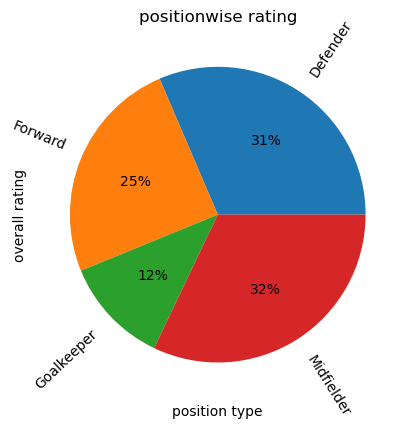

In [210]:
l=['Defender','Forward','Goalkeeper','Midfielder']           

plt.pie(data=df,x=df['ovr'].groupby(df['pos_type']).sum(),labels=l,autopct='%.f%%',rotatelabels=True,)
plt.xlabel('position type')
plt.ylabel('overall rating')
plt.title('positionwise rating')
plt.show()

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'nat'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'pos_id'}>,
        <Axes: title={'center': 'ovr'}>, <Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'dribbling'}>],
       [<Axes: title={'center': 'low_pass'}>,
        <Axes: title={'center': 'finishing'}>,
        <Axes: title={'center': 'defensive_awareness'}>,
        <Axes: title={'center': 'speed'}>],
       [<Axes: title={'center': 'body_balance'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'cost_gp'}>, <Axes: >]], dtype=object)

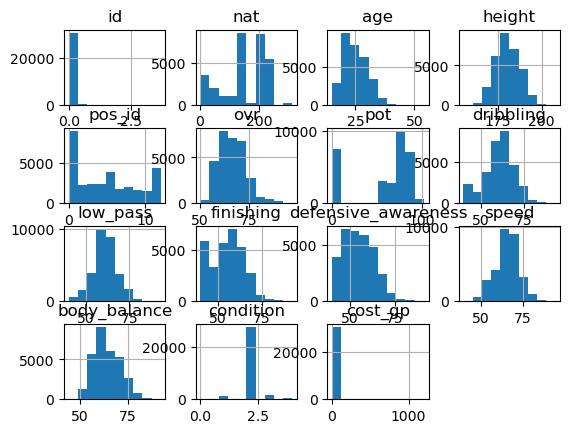

In [211]:
df.hist()

In [214]:
fig = px.histogram(df,x='age_category',y='cost_gp',height=500,width=500,
         template='simple_white',color="pos_type",color_discrete_sequence=[
                 'green',"red","yellow",'black','blue','pink'],title="Categorywise player Cost")
            
            

fig.show()

In [215]:
fig = px.histogram(df,x='pos_type',y='cost_gp',height=500,width=500,
         template='simple_white',color="pos_type",color_discrete_sequence=[
                 'green',"red","yellow",'black'],title="Positionwise Cost")
            
            

fig.show()

In [216]:
fig = px.histogram(df,x='pos_name',y='ovr',height=500,width=500,
         template='simple_white',title="Positionwise overall strentgh")
            
            

fig.show()

In [217]:
fig = px.histogram(df,x='nat_name',y='speed',height=500,width=500,
         template='simple_white',title="Nationwise Speed Distribution")
            
            

fig.show()

<Axes: xlabel='height', ylabel='pos_name'>

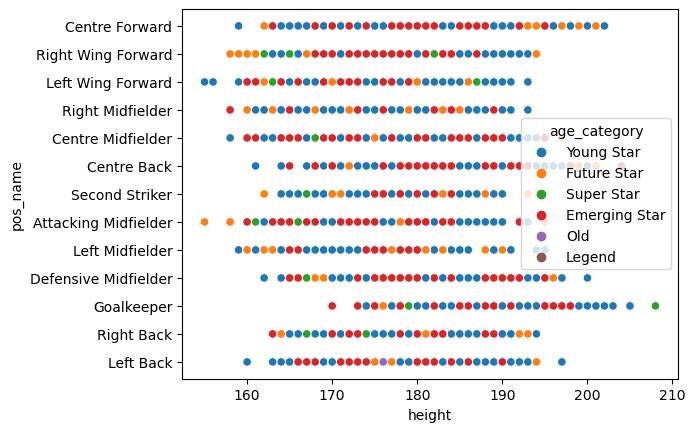

In [228]:
import seaborn as sns
sns.scatterplot(data=df,x=df['height'],y=df['pos_name'],hue=df['age_category'])

<Axes: xlabel='pos_type', ylabel='finishing'>

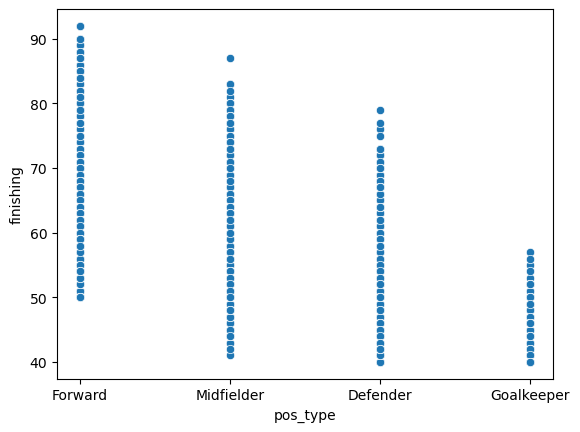

In [233]:
sns.scatterplot(data=df,x=df['pos_type'],y=df['finishing'])

In [78]:
# make copies of df, it will help in future analysis 
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df.to_csv('final_cleaned_efootball_data_csv', index_label=False)


In [92]:
x=df.iloc[:,6:8].values
x

array([[ 23, 178],
       [ 31, 170],
       [ 31, 170],
       ...,
       [ 17, 170],
       [ 16, 170],
       [ 18, 170]], dtype=int64)

In [94]:
y=df.iloc[:,11].values
y

array(['Centre Forward', 'Right Wing Forward', 'Right Wing Forward', ...,
       'Centre Midfielder', 'Centre Back', 'Centre Back'], dtype=object)

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [115]:
x_train

array([[ 19, 183],
       [ 33, 175],
       [ 30, 185],
       ...,
       [ 32, 171],
       [ 25, 191],
       [ 23, 180]], dtype=int64)

In [116]:
y_test

array(['Left Wing Forward', 'Left Wing Forward', 'Right Back', ...,
       'Goalkeeper', 'Centre Back', 'Right Wing Forward'], dtype=object)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [119]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [120]:
# Prediction
y_pred = clf.predict(x_test)
y_pred

array(['Centre Midfielder', 'Centre Midfielder', 'Centre Back', ...,
       'Goalkeeper', 'Centre Forward', 'Centre Midfielder'], dtype=object)

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 23.486024844720497


In [123]:
clf.predict([[23,179]])

array(['Goalkeeper'], dtype=object)

In [124]:
clf.predict([[31,172]])

array(['Goalkeeper'], dtype=object)

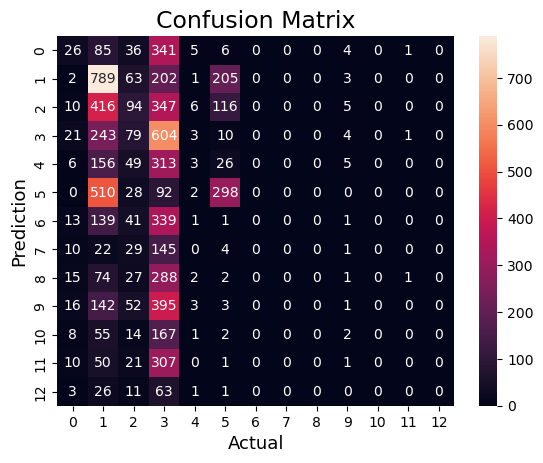

In [125]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#compute the confusion matrix.
cm = confusion_matrix(y_test,y_pred)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [126]:
#KNN Classifer
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [128]:
#Predicting the test set result  
y_pred1= classifier.predict(x_test)
y_pred1

array(['Left Back', 'Left Back', 'Centre Forward', ..., 'Goalkeeper',
       'Centre Midfielder', 'Left Midfielder'], dtype=object)

In [131]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_test, y_pred1)
cm1

array([[114,  83,  57,  77,  40,   8,  36,  11,  19,  32,   2,  23,   2],
       [ 71, 624, 162,  82,  48, 199,  30,   1,   5,  24,   6,  11,   2],
       [ 95, 334, 168, 115,  36,  86,  68,  13,   7,  36,  13,  21,   2],
       [145, 235, 130, 169,  46,  31,  56,  14,  28,  49,  15,  40,   7],
       [ 85, 121,  62,  65, 101,  26,  40,   8,   5,  25,   4,  15,   1],
       [ 30, 387, 108,  49,  32, 300,  11,   0,   1,   5,   2,   5,   0],
       [ 77, 105,  73,  79,  38,  14,  61,   7,  10,  40,   5,  20,   6],
       [ 31,  47,  38,  20,  10,   4,   9,  24,   7,   6,   2,  12,   1],
       [ 87,  75,  45,  64,  27,  11,  26,  14,  16,  17,   4,  17,   7],
       [112, 119,  79,  84,  38,  21,  36,   3,   9,  79,   6,  22,   4],
       [ 34,  47,  24,  40,  13,   3,  15,   1,   2,  37,  17,  15,   1],
       [ 77,  71,  39,  53,  24,   5,  22,   7,  17,  23,   7,  45,   0],
       [ 14,  22,   9,  16,   4,   1,   5,   2,   1,   1,   0,   4,  26]],
      dtype=int64)

In [134]:
acc = accuracy_score(y_test, y_pred1)
print("KNN Classifier model accuracy (in %):", acc*100)

KNN Classifier model accuracy (in %): 22.56728778467909


In [135]:
classifier.predict([[18,150]])

array(['Goalkeeper'], dtype=object)

In [136]:
classifier.predict([[40,170]])

array(['Goalkeeper'], dtype=object)